In [1]:
%pylab inline
from matplotlib import pylab as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
cv_1d_harmonic = np.loadtxt('output_1d/harmonic_1d_unbiased.colvars.dat')
cv_1d_harmonic_eds = np.loadtxt('output_1d/harmonic_1d_eds.colvars.dat')
cv_1d_harmonic_restraint = np.loadtxt('output_1d/harmonic_1d_restraint.colvars.dat')

/home/gmh4/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gmh4/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


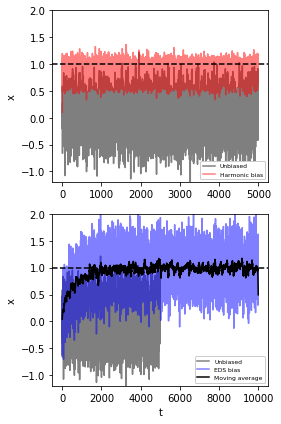

In [3]:
fig, ax = plt.subplots(2,1,figsize=(4,6))

ax[0].plot(cv_1d_harmonic[:,0],cv_1d_harmonic[:,1],alpha=0.5,label='Unbiased',c='k')
ax[0].plot(cv_1d_harmonic_restraint[:,0],cv_1d_harmonic_restraint[:,1],alpha=0.5,label='Harmonic bias',c='r')
ax[0].legend(loc='lower right',framealpha=1,fontsize=6)
ax[0].axhline(1.0,ls='--',c='k')
ax[0].set_ylabel('x')
ax[0].set_ylim(-1.2,2)


ax[1].plot(cv_1d_harmonic[:,0],cv_1d_harmonic[:,1],alpha=0.5,label='Unbiased',c='k')
ax[1].plot(cv_1d_harmonic_eds[:,0],cv_1d_harmonic_eds[:,1],alpha=0.5, label='EDS bias',c='b')


#moving average of size 50
window_size = 50
b = np.ones(window_size)
c = np.convolve(cv_1d_harmonic_eds[:,1],b,'same')/window_size

ax[1].plot(cv_1d_harmonic_eds[:,0],c,alpha=1.0, c='k',label='Moving average')
ax[1].set_ylim(-1.2,2)


ax[1].axhline(1.0,ls='--',c='k')
ax[1].legend(loc='lower right',framealpha=1,fontsize=6)
ax[1].set_ylabel('x')
ax[1].set_xlabel('t')

plt.tight_layout()
plt.savefig('../figures/masterclass-22-6-comp_rest_eds.png',dpi=90)

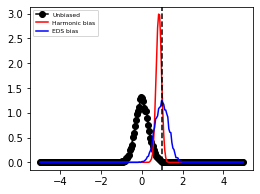

In [4]:
hist, bins = np.histogram(cv_1d_harmonic[len(cv_1d_harmonic)//2:,1],bins=np.arange(-5,5+0.005,0.05),density=True)
hist_restraint, bins = np.histogram(cv_1d_harmonic_restraint[len(cv_1d_harmonic_restraint)//2:,1],bins=bins,density=True)
hist_eds, bins = np.histogram(cv_1d_harmonic_eds[len(cv_1d_harmonic_eds)//2:,1],bins=bins,density=True)

plt.figure(figsize=(4,3))
bin_centers = (bins[1:]+bins[:-1])/2
sigma = np.sqrt(1/10.)
ideal_hist = 1/np.sqrt(2*pi*(sigma**2))*np.exp(-bin_centers**2/2/sigma**2)
plt.plot(bin_centers,ideal_hist,linestyle='--',c='k')
plt.plot(bin_centers,hist,marker='o',c='k',label='Unbiased')
plt.plot(bin_centers,hist_restraint, c='r',label="Harmonic bias")
plt.plot(bin_centers,hist_eds, c='b',label="EDS bias")
plt.legend(loc='upper left',fontsize=6)
plt.axvline(1.0,c='k',linestyle='--')
plt.savefig('../figures/masterclass-22-6-comp_rest_eds_hist.png',dpi=90)

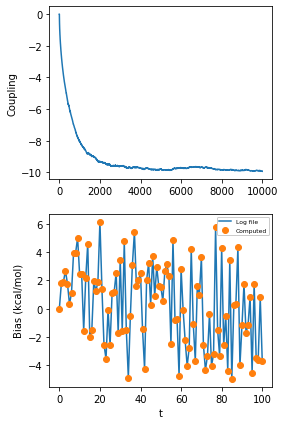

In [5]:
# analyze bias 
center = 1.0 #see restart file
fig, ax = plt.subplots(2,1,figsize=(4,7))

ax[0].plot(cv_1d_harmonic_eds[:,9])

ax[0].set_ylabel("Coupling")
ax[1].plot(cv_1d_harmonic_eds[::100,7],label='Log file')
ax[1].plot(cv_1d_harmonic_eds[::100,9]*(cv_1d_harmonic_eds[::100,1]-center),label='Computed',marker='o',linestyle='')

ax[1].legend(loc='upper right',framealpha=1,fontsize=6)
ax[1].set_xlabel("t")
ax[1].set_ylabel("Bias (kcal/mol)")
plt.savefig('../figures/masterclass-22-6-1d_check_bias.png',dpi=90)

# 2D

In [6]:
cv_2d_harmonic = np.loadtxt('output_2d/harmonic_2d_unbiased.colvars.dat')
cv_2d_harmonic_eds_shiftx = np.loadtxt('output_2d/harmonic_2d_eds_shiftx.colvars.dat')
cv_2d_harmonic_eds_shifty = np.loadtxt('output_2d/harmonic_2d_eds_shifty.colvars.dat')
cv_2d_harmonic_eds_shiftxy = np.loadtxt('output_2d/harmonic_2d_eds_shiftxy.colvars.dat')


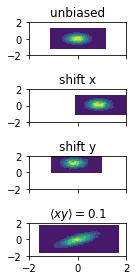

In [7]:
fig, ax = plt.subplots(4,1,figsize=(2,4),sharex=True,sharey=True)
h, xedges, yedges = np.histogram2d(cv_2d_harmonic[:,1],cv_2d_harmonic[:,2],bins=(20,20),density=True)
ax[0].set_title('unbiased')
ax[0].contourf(( xedges[:-1]+xedges[1:])*0.5, (yedges[1:]+yedges[:-1])*0.5, h)
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-2,2)
#plt.colorbar()

ax[1].set_title('shift x')
h, xedges, yedges = np.histogram2d(cv_2d_harmonic_eds_shiftx[len(cv_2d_harmonic_eds_shiftx)//2:,1],cv_2d_harmonic_eds_shiftx[len(cv_2d_harmonic_eds_shiftx)//2:,2],bins=(20,20),density=True)
ax[1].contourf(( xedges[:-1]+xedges[1:])*0.5, (yedges[1:]+yedges[:-1])*0.5, h)

ax[2].set_title('shift y')
h, xedges, yedges = np.histogram2d(cv_2d_harmonic_eds_shifty[len(cv_2d_harmonic_eds_shifty)//2:,1],cv_2d_harmonic_eds_shifty[len(cv_2d_harmonic_eds_shifty)//2:,2],bins=(20,20),density=True)
ax[2].contourf(( xedges[:-1]+xedges[1:])*0.5, (yedges[1:]+yedges[:-1])*0.5, h)

ax[3].set_title('$\\langle xy \\rangle = 0.1$')
h, xedges, yedges = np.histogram2d(cv_2d_harmonic_eds_shiftxy[len(cv_2d_harmonic_eds_shiftxy)//2:,1],cv_2d_harmonic_eds_shiftxy[len(cv_2d_harmonic_eds_shiftxy)//2:,2],bins=(20,20),density=True)
ax[3].contourf(( xedges[:-1]+xedges[1:])*0.5, (yedges[1:]+yedges[:-1])*0.5, h)

plt.tight_layout()
plt.savefig('../figures/masterclass-22-6-2d_bias.png',dpi=90)